In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Online_Retail_dataset.csv")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [3]:
df=pd.DataFrame(data)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df = df.dropna(subset=["CustomerID"])

In [7]:
df["CustomerID"] = df["CustomerID"].astype(str).str.strip()
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

C:\Users\PMLS\AppData\Local\Temp\ipykernel_15628\139684488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CustomerID"] = df["CustomerID"].astype(str).str.strip()
C:\Users\PMLS\AppData\Local\Temp\ipykernel_15628\139684488.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")
C:\Users\PMLS\AppData\Local\Temp\ipykernel_15628\139684488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [8]:
df = df[~df["InvoiceNo"].astype(str).str.startswith("C", na=False)]
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

In [9]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

In [10]:
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

In [11]:
rfm = (
    df.groupby("CustomerID")
      .agg(
          Recency=("InvoiceDate", lambda x: (snapshot_date - x.max()).days),
          Frequency=("InvoiceNo", "nunique"),
          Monetary=("Revenue", "sum"),
      )
      .reset_index()
)
rfm = rfm[rfm["Monetary"] > 0]
rfm["R_Score"] = pd.qcut(rfm["Recency"], 5, labels=[5,4,3,2,1]).astype(int)
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1,2,3,4,5]).astype(int)
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 5, labels=[1,2,3,4,5]).astype(int)
rfm["RFM_Score"] = rfm[["R_Score","F_Score","M_Score"]].sum(axis=1)
rfm["RFM_Code"]  = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)

In [12]:
def segment_row(r):
    if r.R_Score >= 4 and r.F_Score >= 4 and r.M_Score >= 4:
        return "Champions"
    if r.R_Score >= 4 and r.F_Score >= 3:
        return "Loyal"
    if r.R_Score >= 4 and r.F_Score <= 2:
        return "New Customers"
    if r.R_Score <= 2 and r.F_Score >= 4:
        return "At Risk Loyal"
    if r.R_Score <= 2 and r.M_Score <= 2:
        return "Lost"
    return "Potential Loyalist"

rfm["Segment"] = rfm.apply(segment_row, axis=1)

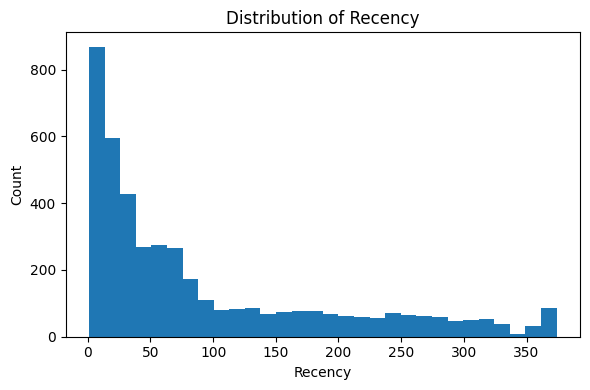

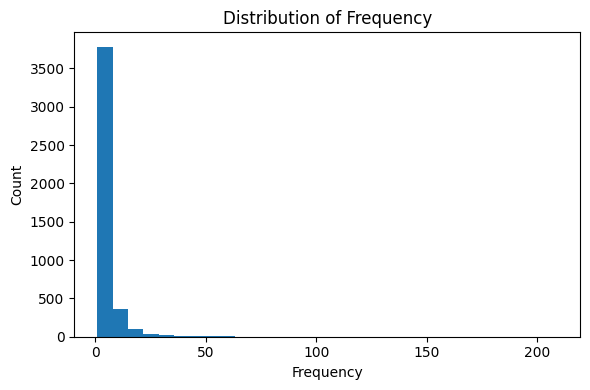

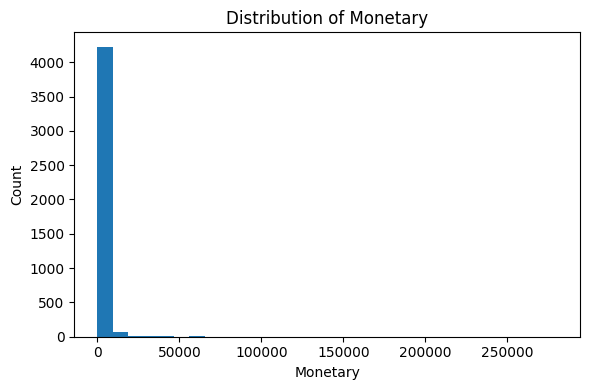

In [15]:
for col in ["Recency","Frequency","Monetary"]:
    plt.figure(figsize=(6,4))
    plt.hist(rfm[col], bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col); plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

NameError: name 'np' is not defined

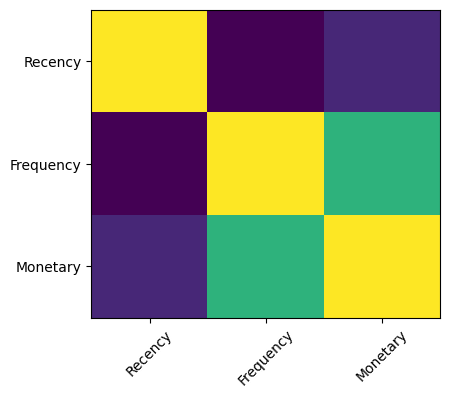

In [16]:
corr = rfm[["Recency","Frequency","Monetary"]].corr()
plt.figure(figsize=(4.5,4))
plt.imshow(corr, interpolation="nearest", aspect="auto")
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
for (i, j), val in np.ndenumerate(corr.values):
    plt.text(j, i, f"{val:.2f}", ha="center", va="center")
plt.title("Correlation: R vs F vs M")
plt.colorbar()
plt.tight_layout()
plt.show()

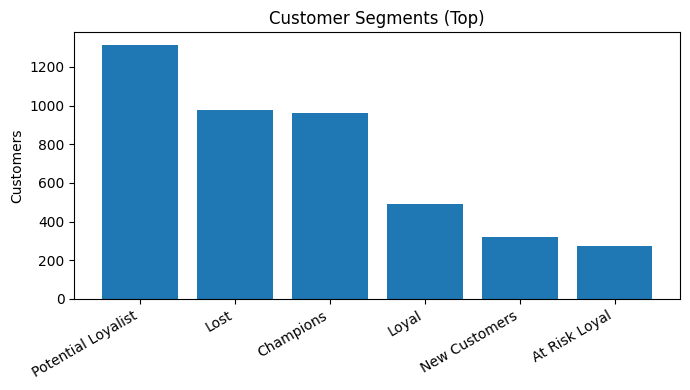

In [17]:
seg_counts = rfm["Segment"].value_counts().head(10)
plt.figure(figsize=(7,4))
plt.bar(seg_counts.index, seg_counts.values)
plt.title("Customer Segments (Top)")
plt.ylabel("Customers"); plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

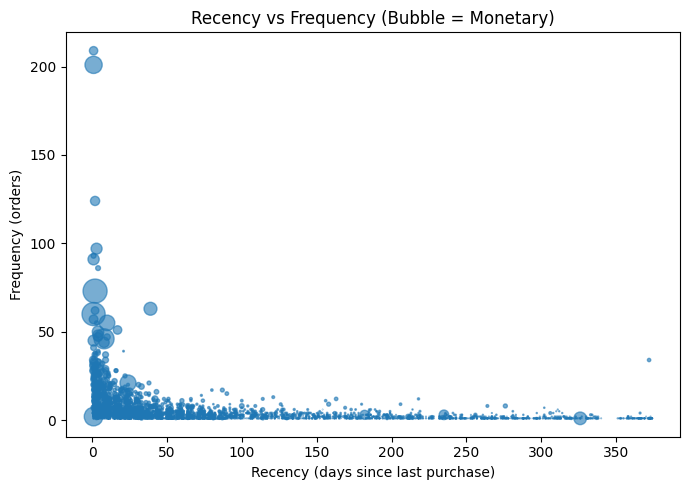

In [18]:
plt.figure(figsize=(7,5))
plt.scatter(rfm["Recency"], rfm["Frequency"], s=(rfm["Monetary"] / rfm["Monetary"].max())*300, alpha=0.6)
plt.title("Recency vs Frequency (Bubble = Monetary)")
plt.xlabel("Recency (days since last purchase)")
plt.ylabel("Frequency (orders)")
plt.tight_layout()
plt.show()

In [30]:
df = df.dropna(subset=["CustomerID"]).copy()
df["CustomerID"] = df["CustomerID"].astype(str).str.strip()
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

# Remove credit notes/returns (InvoiceNo starting with 'C') and negative values
df = df[~df["InvoiceNo"].astype(str).str.startswith("C", na=False)]
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)].copy()

# Create revenue
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

rfm = (
    df.groupby("CustomerID")
      .agg(
          Recency = ("InvoiceDate", lambda x: (snapshot_date - x.max()).days),
          Frequency = ("InvoiceNo", "nunique"),   # number of orders
          Monetary = ("Revenue", "sum"),
      )
      .reset_index()
)

rfm = rfm[rfm["Monetary"] > 0].copy()

rfm["Monetary_log"] = np.log1p(rfm["Monetary"])  # use this when scoring Monetary

rfm["R_Score"] = pd.qcut(
    rfm["Recency"].rank(method="first"),
    5,
    labels=[5, 4, 3, 2, 1]
).astype(int)

rfm["F_Score"] = pd.qcut(
    rfm["Frequency"].rank(method="first"),
    5,
    labels=[1, 2, 3, 4, 5]
).astype(int)

try:
    rfm["M_Score"] = pd.qcut(
        rfm["Monetary_log"].rank(method="first"),
        5,
        labels=[1, 2, 3, 4, 5]
    ).astype(int)
except ValueError:
    # fallback: equal-width bins on the log monetary
    rfm["M_Score"] = pd.cut(
        rfm["Monetary_log"],
        bins=5,
        labels=[1, 2, 3, 4, 5]
    ).astype(int)


rfm["RFM_Code"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)
rfm["RFM_Sum"]  = rfm[["R_Score", "F_Score", "M_Score"]].sum(axis=1)


weights = {"R": 0.4, "F": 0.3, "M": 0.3}
rfm["RFM_Weighted"] = (rfm["R_Score"] * weights["R"]
                       + rfm["F_Score"] * weights["F"]
                       + rfm["M_Score"] * weights["M"])

def rfm_segment(row):
    if (row.R_Score >= 4) and (row.F_Score >= 4) and (row.M_Score >= 4):
        return "Champions"
    if (row.R_Score >= 4) and (row.F_Score >= 3):
        return "Loyal"
    if (row.R_Score >= 4) and (row.F_Score <= 2):
        return "New Customers"
    if (row.R_Score <= 2) and (row.F_Score >= 4):
        return "At Risk"
    if (row.R_Score <= 2) and (row.F_Score <= 2) and (row.M_Score <= 2):
        return "Lost"
    return "Potential / Other"

rfm["Segment"] = rfm.apply(rfm_segment, axis=1)
rfm_out = rfm[[
    "CustomerID", "Recency", "Frequency", "Monetary",
    "R_Score", "F_Score", "M_Score", "RFM_Code", "RFM_Sum", "RFM_Weighted", "Segment"
]]

rfm_out.to_csv("rfm_scored_customers.csv", index=False)
print("Saved rfm_scored_customers.csv")
print(rfm_out.head(10).to_string(index=False))


Saved rfm_scored_customers.csv
CustomerID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score RFM_Code  RFM_Sum  RFM_Weighted           Segment
   12346.0      326          1  77183.60        1        1        5      115        7           2.2 Potential / Other
   12347.0        2          7   4310.00        5        5        5      555       15           5.0         Champions
   12348.0       75          4   1797.24        2        4        4      244       10           3.2           At Risk
   12349.0       19          1   1757.55        4        1        4      414        9           3.1     New Customers
   12350.0      310          1    334.40        1        1        2      112        4           1.3              Lost
   12352.0       36          8   2506.04        3        5        5      355       13           4.2 Potential / Other
   12353.0      204          1     89.00        1        1        1      111        3           1.0              Lost
   12354.0      232      

In [31]:
from sklearn.preprocessing import StandardScaler

rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

In [32]:
from sklearn.cluster import KMeans

# Choose number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)

# Add cluster labels to RFM table
rfm['Cluster'] = kmeans.labels_

In [33]:
cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print(cluster_summary)

            Recency  Frequency       Monetary
Cluster                                      
0         43.702685   3.682711    1359.049284
1        248.075914   1.552015     480.617480
2          7.384615  82.538462  127338.313846
3         15.500000  22.333333   12709.090490


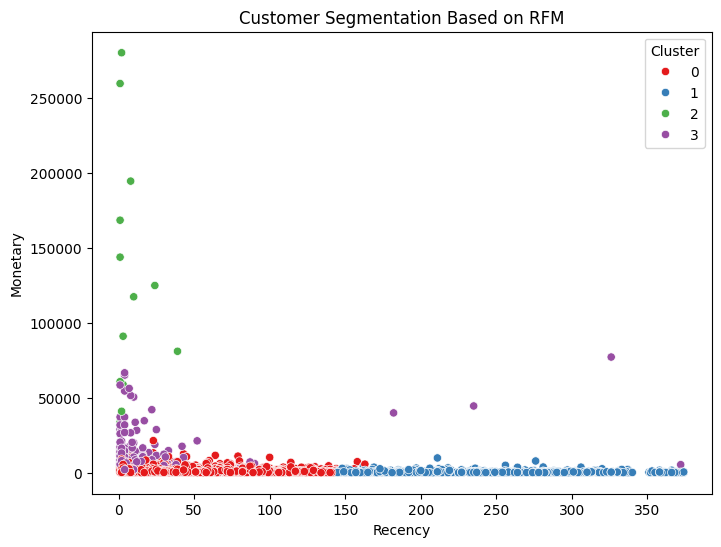

In [34]:

plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set1')
plt.title('Customer Segmentation Based on RFM')
plt.show()

In [36]:
data = {
    'CustomerID': [1, 2, 3, 4],
    'R_Score': [5, 3, 1, 4],
    'F_Score': [5, 3, 1, 2],
    'M_Score': [5, 3, 2, 1]
}
df = pd.DataFrame(data)
def segment_customer(row):
    if row['R_Score'] >= 4 and row['F_Score'] >= 4 and row['M_Score'] >= 4:
        return 'VIP / Champion'
    elif row['R_Score'] >= 3 and row['F_Score'] >= 3:
        return 'Potential Loyalist'
    elif row['R_Score'] <= 2:
        return 'At Risk / Inactive'
    else:
        return 'New Customer'

df['Segment'] = df.apply(segment_customer, axis=1)

# Add simple marketing suggestion
marketing_ideas = {
    'VIP / Champion': 'Give exclusive offers & early access',
    'Potential Loyalist': 'Upsell with recommendations',
    'At Risk / Inactive': 'Send win-back discounts',
    'New Customer': 'Send welcome emails & next-purchase discount'
}
df['Marketing_Idea'] = df['Segment'].map(marketing_ideas)

print(df)

   CustomerID  R_Score  F_Score  M_Score             Segment  \
0           1        5        5        5      VIP / Champion   
1           2        3        3        3  Potential Loyalist   
2           3        1        1        2  At Risk / Inactive   
3           4        4        2        1        New Customer   

                                 Marketing_Idea  
0          Give exclusive offers & early access  
1                   Upsell with recommendations  
2                       Send win-back discounts  
3  Send welcome emails & next-purchase discount  


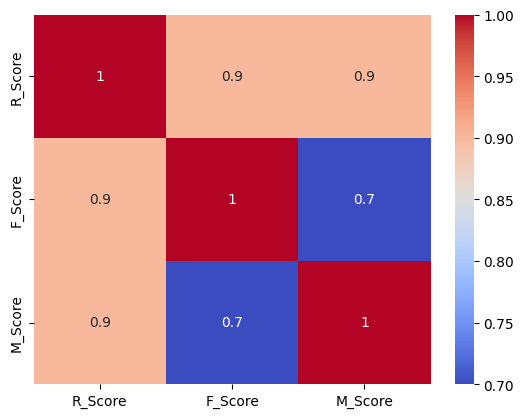

In [39]:
df = pd.DataFrame({
    'R_Score': [5, 4, 3, 2, 1],
    'F_Score': [5, 3, 4, 2, 1],
    'M_Score': [5, 4, 2, 3, 1]
})

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()